## Preparing Time Series from Wide-Form Data Core
---
* ### Ingrid Arbieto Nelson

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preparing-Time-Series-from-Wide-Form-Data-Core" data-toc-modified-id="Preparing-Time-Series-from-Wide-Form-Data-Core-1">Preparing Time Series from Wide-Form Data Core</a></span><ul class="toc-item"><li><span><a href="#Ingrid-Arbieto-Nelson" data-toc-modified-id="Ingrid-Arbieto-Nelson-1.1">Ingrid Arbieto Nelson</a></span></li><li><span><a href="#Task" data-toc-modified-id="Task-1.2">Task</a></span></li><li><span><a href="#Part-1" data-toc-modified-id="Part-1-1.3">Part 1</a></span></li><li><span><a href="#Part-2" data-toc-modified-id="Part-2-1.4">Part 2</a></span></li></ul></li><li><span><a href="#Part-1-:-Prepare-Data-for-Time-Series" data-toc-modified-id="Part-1-:-Prepare-Data-for-Time-Series-2">Part 1 : Prepare Data for Time Series</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-2.1">Imports</a></span></li><li><span><a href="#Plotting-Functions" data-toc-modified-id="Plotting-Functions-2.2">Plotting Functions</a></span></li><li><span><a href="#Load-Zillow-Home-Value-Index-Data" data-toc-modified-id="Load-Zillow-Home-Value-Index-Data-2.3">Load Zillow Home Value Index Data</a></span></li><li><span><a href="#Filter-the-4-largest-cities" data-toc-modified-id="Filter-the-4-largest-cities-2.4">Filter the 4 largest cities</a></span></li><li><span><a href="#Melt-data-to-long-form-&amp;-Prepare-for-Time-series-Analysis" data-toc-modified-id="Melt-data-to-long-form-&amp;-Prepare-for-Time-series-Analysis-2.5">Melt data to long-form &amp; Prepare for Time series Analysis</a></span></li><li><span><a href="#Resample-the-dataframe-as-monthly-frequency,-grouped-by-City." data-toc-modified-id="Resample-the-dataframe-as-monthly-frequency,-grouped-by-City.-2.6">Resample the dataframe as monthly frequency, grouped by City.</a></span></li></ul></li><li><span><a href="#Part-2-:-Plot-Home-Values-&amp;-Answer-Questions" data-toc-modified-id="Part-2-:-Plot-Home-Values-&amp;-Answer-Questions-3">Part 2 : Plot Home Values &amp; Answer Questions</a></span><ul class="toc-item"><li><span><a href="#Plot-the-home-values-for-all-4-cities." data-toc-modified-id="Plot-the-home-values-for-all-4-cities.-3.1">Plot the home values for all 4 cities.</a></span></li></ul></li></ul></div>

### Task

You will be working with Zillow's publicly available Zillow House Value Index (ZHVI) https://www.zillow.com/research/data/

* Specifically, you will be using the Home Value data set for:
   * Data Type = "ZHVI All Homes (SFR+Condo/Coop) - Time Series - Smoothed - Seasonally Adjusted"
   * Geography = "City"
* We have already downloaded the file for you and uploaded it to Google Drive.
   * Share URL: https://drive.google.com/file/d/1O_g44QAfe3uVF-1heAC0BAeVDoWloVR-/view?usp=sharing
   * Direct URL (for Pandas): https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv


### Part 1
First, you will prepare the dataset for time series analysis:
* **Load in the Zillow Home Value Index dataframe.**
  * Note: it is a large file and may take a minute to load.
* **Filter the 4 largest cities into a new dataframe.**
  * *Tip: the "SizeRank" column has already ranked the cities by size. The larger the city, the smaller the rank value.*
      * *Therefore the 4 largest cities would have rank values of [0,1,2,3]*
* **Melt the data to long-form and prepare it for time series analysis.**
  * Convert the melted dates into datetime datatype.
  * Make the datetime column the index.
* **Resample the dataframe as monthly frequency, grouped by City.**

### Part 2
Once you've prepared the dataframe with the time series data for the 4 largest cities:
* **Plot the home values for all 4 cities.**(Hint: use unstack)
   * Make sure to add a title and axis labels.
   * Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. (e.g. "200K, 400K, etc")
      * *Hint: use the FuncFormatter from matplotlib.*
* **Answer the following 2 questions using pandas**:
  * 1) **Which City had the highest Typical Home Value at the end of 2008? Which had the least?**
     * *Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex.*
  * 2) **How much did the home values change from November 2008 to December 2008 (in dollars)?**
     * *Hint: you can use .diff() to calculate the change in values*

## Part 1 : Prepare Data for Time Series

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
# set random seed
SEED = 321
np.random.seed(SEED)

In [2]:
## Customization Options
# plt.style.use(['fivethirtyeight'])#'seaborn-talk'])#,
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
sns.set_context("talk", font_scale=0.9)

### Plotting Functions

In [3]:
def format_xdates(ax, fig=None, xtick_fontweight='bold',
               title= None):
    """Formats x-axis with minor ticks every 1 year, and major 
    ticks every 5 years. Includes different grid options for visibility"""
    # create the locator to place ticks every 1 year
    loc_1year = mdates.YearLocator(1)
    
    ## for major year ticks
    loc_year = mdates.YearLocator(5)
    fmt_year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontweight=xtick_fontweight) 
    
    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_1year)
    
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distince
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    if fig is None:
        fig = ax.get_figure()
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax

In [4]:
def millions(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000_000
    return f"{new_x:,.0f}M"
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatters
fmt_mill = mticks.FuncFormatter(millions)
fmt_thous = mticks.FuncFormatter(thousands)

### Load Zillow Home Value Index Data

In [5]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv"
df = pd.read_csv(url)
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,236350,28439,Palisades,city,TX,TX,"Amarillo, TX",Randall County,NaN,NaN,...,198490.0,198467.0,196420.0,192002.0,191634.0,189383.0,191134.0,191343.0,192384.0,192110.0
22463,40403,28439,Port Mansfield,city,TX,TX,"Raymondville, TX",Willacy County,NaN,NaN,...,229251.0,232984.0,238245.0,240154.0,242470.0,243119.0,249098.0,255572.0,261910.0,264685.0
22464,54740,28439,Tribes Hill,city,NY,NY,"Amsterdam, NY",Montgomery County,53380.0,53662.0,...,132490.0,134951.0,137470.0,137430.0,137413.0,137615.0,138908.0,140096.0,141573.0,142438.0
22465,249186,28439,Derby Center,city,VT,VT,NaN,Orleans County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,258191.0,261607.0,264571.0,266255.0


In [6]:
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


### Filter the 4 largest cities 

In [8]:
# filter for 4 largest city entries, cities with size rank 0,1,2,3
df = df[df['SizeRank'].isin([0,1,2,3])]


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 8.8+ KB


### Melt data to long-form & Prepare for Time series Analysis

* Convert the melted dates into datetime datatype.
* Make the datetime column the index.

In [10]:
melted = pd.melt(df,id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType','StateName',
       'State', 'Metro', 'CountyName'] )
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,variable,value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [11]:
df['StateName'].value_counts()

NY    1
CA    1
TX    1
IL    1
Name: StateName, dtype: int64

In [12]:
df['State'].value_counts()

NY    1
CA    1
TX    1
IL    1
Name: State, dtype: int64

In [13]:
df['RegionType'].value_counts()

city    4
Name: RegionType, dtype: int64

In [14]:
melted = pd.melt(df.drop(columns=['RegionID','SizeRank','RegionType','StateName']),
                 id_vars=['RegionName','State', 'Metro', 'CountyName'],
                value_name='HomeValue',var_name="Date")
melted

,RegionName,State,Metro,CountyName,Date,HomeValue
0,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,Houston,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,Chicago,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...
1087,Chicago,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,Houston,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [15]:
melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionName  1092 non-null   object        
 1   State       1092 non-null   object        
 2   Metro       1092 non-null   object        
 3   CountyName  1092 non-null   object        
 4   Date        1092 non-null   datetime64[ns]
 5   HomeValue   1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 51.3+ KB


In [16]:
melted = melted.set_index("Date")
melted

,RegionName,State,Metro,CountyName,HomeValue
Date,,,,,
2000-01-31,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,Houston,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,Chicago,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...
2022-08-31,Chicago,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


### Resample the dataframe as monthly frequency, grouped by City.

In [17]:
df_ts = melted.groupby('RegionName').resample("M").mean()
df_ts

C:\Users\sweet\AppData\Local\Temp\ipykernel_4836\906173531.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('RegionName').resample("M").mean()
C:\Users\sweet\AppData\Local\Temp\ipykernel_4836\906173531.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('RegionName').resample("M").mean()
C:\Users\sweet\AppData\Local\Temp\ipykernel_4836\906173531.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should b

HomeValue
RegionName Date                 
Chicago    2000-01-31   166139.0
           2000-02-29   166536.0
           2000-03-31   167368.0
           2000-04-30   168826.0
           2000-05-31   170499.0
...                          ...
New York   2022-05-31   768797.0
           2022-06-30   773944.0
           2022-07-31   777692.0
           2022-08-31   779960.0
           2022-09-30   781622.0

[1092 rows x 1 columns]

## Part 2 : Plot Home Values & Answer Questions

### Plot the home values for all 4 cities.

In [18]:
plot_df = df_ts.copy()
plot_df

HomeValue
RegionName Date                 
Chicago    2000-01-31   166139.0
           2000-02-29   166536.0
           2000-03-31   167368.0
           2000-04-30   168826.0
           2000-05-31   170499.0
...                          ...
New York   2022-05-31   768797.0
           2022-06-30   773944.0
           2022-07-31   777692.0
           2022-08-31   779960.0
           2022-09-30   781622.0

[1092 rows x 1 columns]

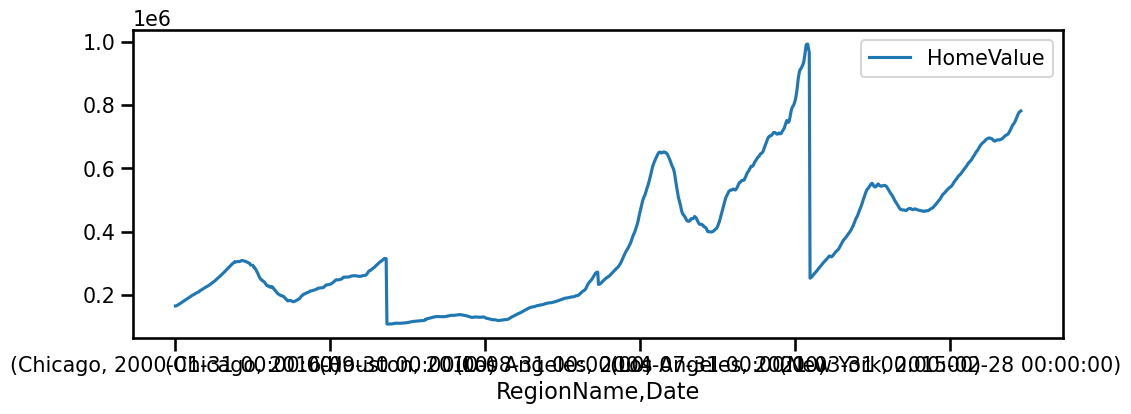

In [19]:
plot_df.plot(figsize=(12,4));

In [20]:
# level 0 is City/Region
plot_df.index.get_level_values(0)

Index(['Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago',
       'Chicago', 'Chicago', 'Chicago', 'Chicago',
       ...
       'New York', 'New York', 'New York', 'New York', 'New York', 'New York',
       'New York', 'New York', 'New York', 'New York'],
      dtype='object', name='RegionName', length=1092)

In [21]:
# level 1 is Date
plot_df.index.get_level_values(1)

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
               '2022-08-31', '2022-09-30'],
              dtype='datetime64[ns]', name='Date', length=1092, freq=None)

In [22]:
unstacked = plot_df.unstack(level=0)
unstacked

HomeValue                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-31  166139.0  109068.0    234181.0  253690.0
2000-02-29  166536.0  109079.0    234401.0  255517.0
2000-03-31  167368.0  108878.0    235513.0  257207.0
2000-04-30  168826.0  108881.0    237589.0  260310.0
2000-05-31  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-31  312487.0  265558.0    990391.0  768797.0
2022-06-30  314663.0  268901.0    992337.0  773944.0
2022-07-31  315910.0  271059.0    992630.0  777692.0
2022-08-31  315587.0  272400.0    978196.0  779960.0
2022-09-30  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

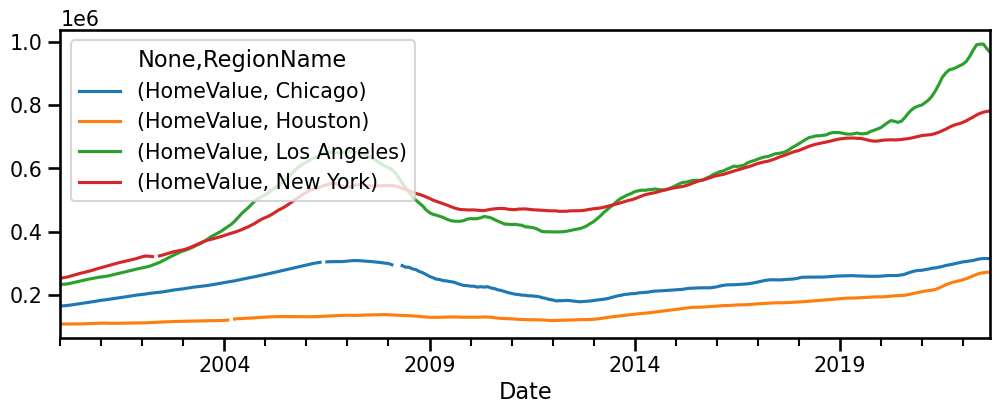

In [23]:
ax = unstacked.plot()

In [24]:
unstacked.columns

MultiIndex([('HomeValue',     'Chicago'),
            ('HomeValue',     'Houston'),
            ('HomeValue', 'Los Angeles'),
            ('HomeValue',    'New York')],
           names=[None, 'RegionName'])

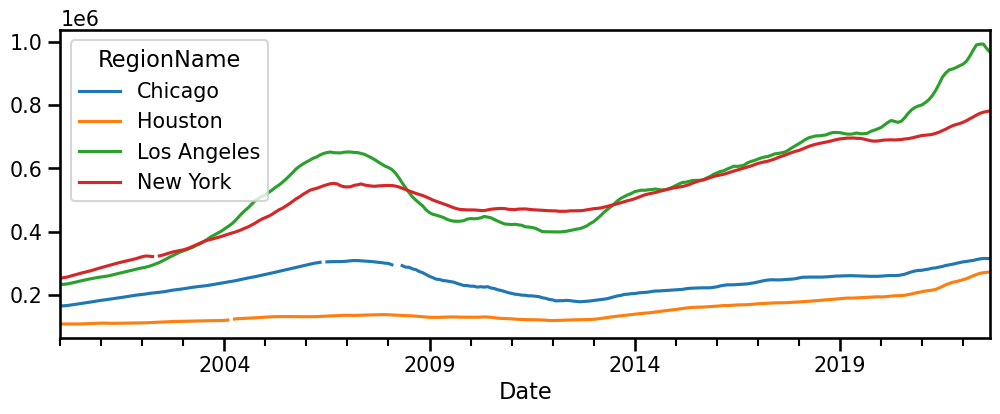

In [25]:
ax = unstacked['HomeValue'].plot()

In [26]:
str_fmt = mticks.StrMethodFormatter("{x:,.0f}")
str_fmt

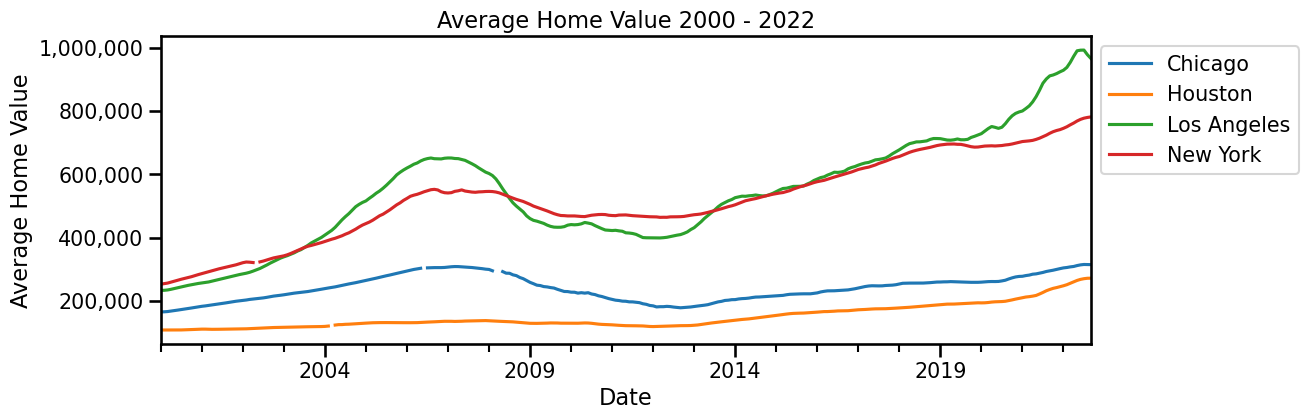

In [32]:
ax = unstacked['HomeValue'].plot(title='Average Home Value 2000 - 2022')
ax.set_ylabel('Average Home Value')

ax.yaxis.set_major_formatter(str_fmt)
ax.legend(bbox_to_anchor = [1, 1]);
#format_xdates(ax);

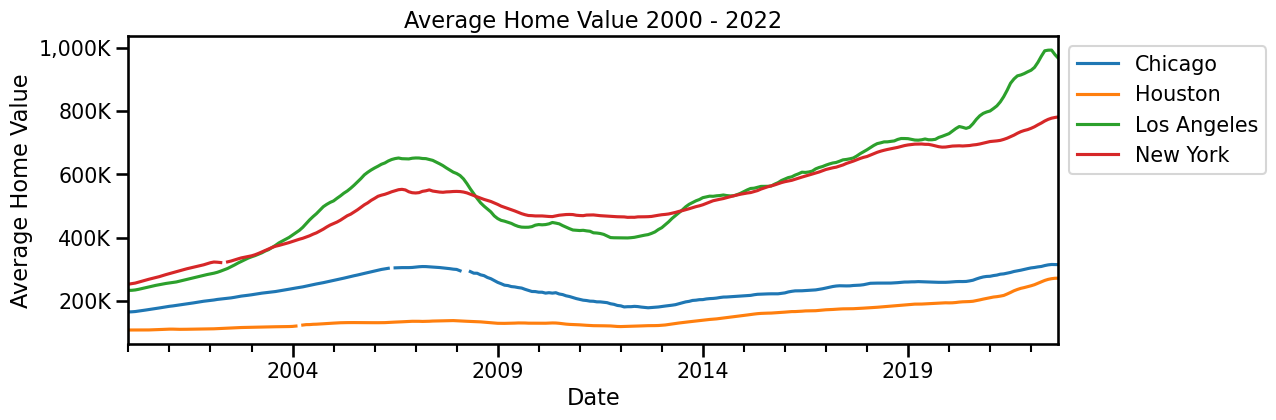

In [34]:
ax = unstacked['HomeValue'].plot(title='Average Home Value 2000 - 2022')
ax.set_ylabel('Average Home Value')

ax.yaxis.set_major_formatter(fmt_thous)

ax.legend(bbox_to_anchor = [1, 1]);
#format_xdates(ax);